<a href="https://colab.research.google.com/github/RangineniSaiPrasanna/NullClass_DataScience_Tasks/blob/main/Task2/model_training2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TASK 2: Oxford Flowers102 Dataset Exploration**

In [ ]:
from torchvision.datasets import OxfordIIITPet
import matplotlib.pyplot as plt
from PIL import Image
import os

#loading the Oxford 102 Flower Dataset
from torchvision.datasets import Flowers102
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = Flowers102(root='.', split='train', transform=transform, download=True)

# Basic info
print(f"Total samples: {len(dataset)}")
print(f"Number of classes: {len(set(dataset._labels))}")


Total samples: 1020
Number of classes: 102


Number of classes: 102
Sample class distribution (Top 5 classes): [(0, 10), (1, 10), (2, 10), (3, 10), (4, 10)]


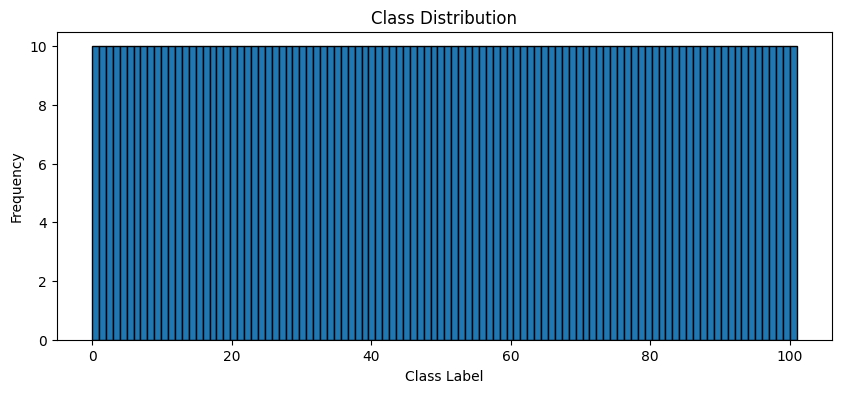

In [ ]:
from torchvision.datasets import Flowers102
from torchvision import transforms
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = Flowers102(root='.', split='train', transform=transform, download=True)

# Number of Classes
num_classes = len(set(dataset._labels))
print(f"Number of classes: {num_classes}")

# Class distribution
label_counts = Counter(dataset._labels)
print(f"Sample class distribution (Top 5 classes): {label_counts.most_common(5)}")

# Plot full class distribution
plt.figure(figsize=(10, 4))
plt.hist(dataset._labels, bins=num_classes, edgecolor='black')
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.show()


Average image size: 624.5 x 537.8
Min size: 500 x 500
Max size: 919 x 993


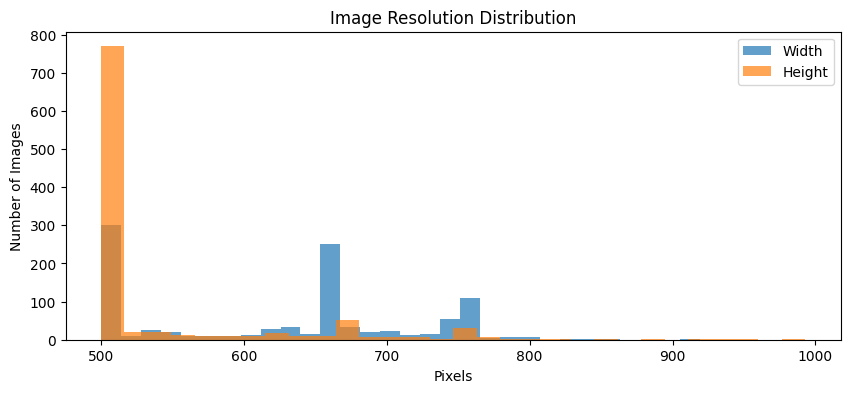

In [ ]:

# Image Resolution Analysis
# Load raw images to get original resolution
raw_dataset = Flowers102(root='.', split='train', transform=None, download=False)
widths = []
heights = []

for i in range(len(raw_dataset)):
    img, _ = raw_dataset[i]
    w, h = img.size
    widths.append(w)
    heights.append(h)

# Display resolution statistics
print(f"Average image size: {np.mean(widths):.1f} x {np.mean(heights):.1f}")
print(f"Min size: {np.min(widths)} x {np.min(heights)}")
print(f"Max size: {np.max(widths)} x {np.max(heights)}")

# Plot resolution distribution
plt.figure(figsize=(10, 4))
plt.hist(widths, bins=30, alpha=0.7, label='Width')
plt.hist(heights, bins=30, alpha=0.7, label='Height')
plt.title("Image Resolution Distribution")
plt.xlabel("Pixels")
plt.ylabel("Number of Images")
plt.legend()
plt.show()


Avg description length: 36.1 characters
Max: 54 | Min: 25


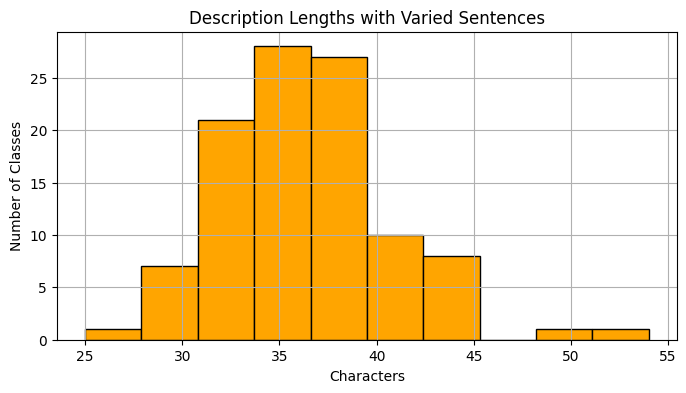

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

templates = [
    "This is an image of a {}.",
    "You can see a {} here.",
    "It shows the {} flower.",
    "A photograph showcasing a {}.",
    "Look at this beautiful {}."
]

# Cycle through templates for diversity
desc_lengths = [
    len(templates[i % len(templates)].format(name.lower()))
    for i, name in enumerate(flower_class_names)
]

print(f"Avg description length: {np.mean(desc_lengths):.1f} characters")
print(f"Max: {np.max(desc_lengths)} | Min: {np.min(desc_lengths)}")

plt.figure(figsize=(8, 4))
plt.hist(desc_lengths, bins=10, edgecolor='black', color='orange')
plt.title("Description Lengths with Varied Sentences")
plt.xlabel("Characters")
plt.ylabel("Number of Classes")
plt.grid(True)
plt.show()


Class distribution (Top 5): [(0, 10), (1, 10), (2, 10), (3, 10), (4, 10)]
Sample image shape: torch.Size([3, 224, 224])


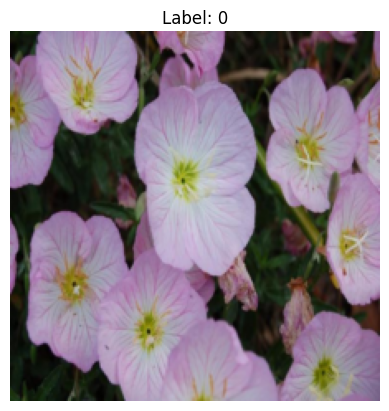

In [ ]:
from collections import Counter

label_counts = Counter(dataset._labels)
print("Class distribution (Top 5):", label_counts.most_common(5))

# Plotting resolution of sample images
img = dataset[0][0]
print(f"Sample image shape: {img.shape}")  # [C, H, W]

# Display sample image with label
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Label: {dataset._labels[0]}")
plt.axis('off')
plt.show()


In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
dataset = datasets.Flowers102(root='data/', transform=transform, download=True)

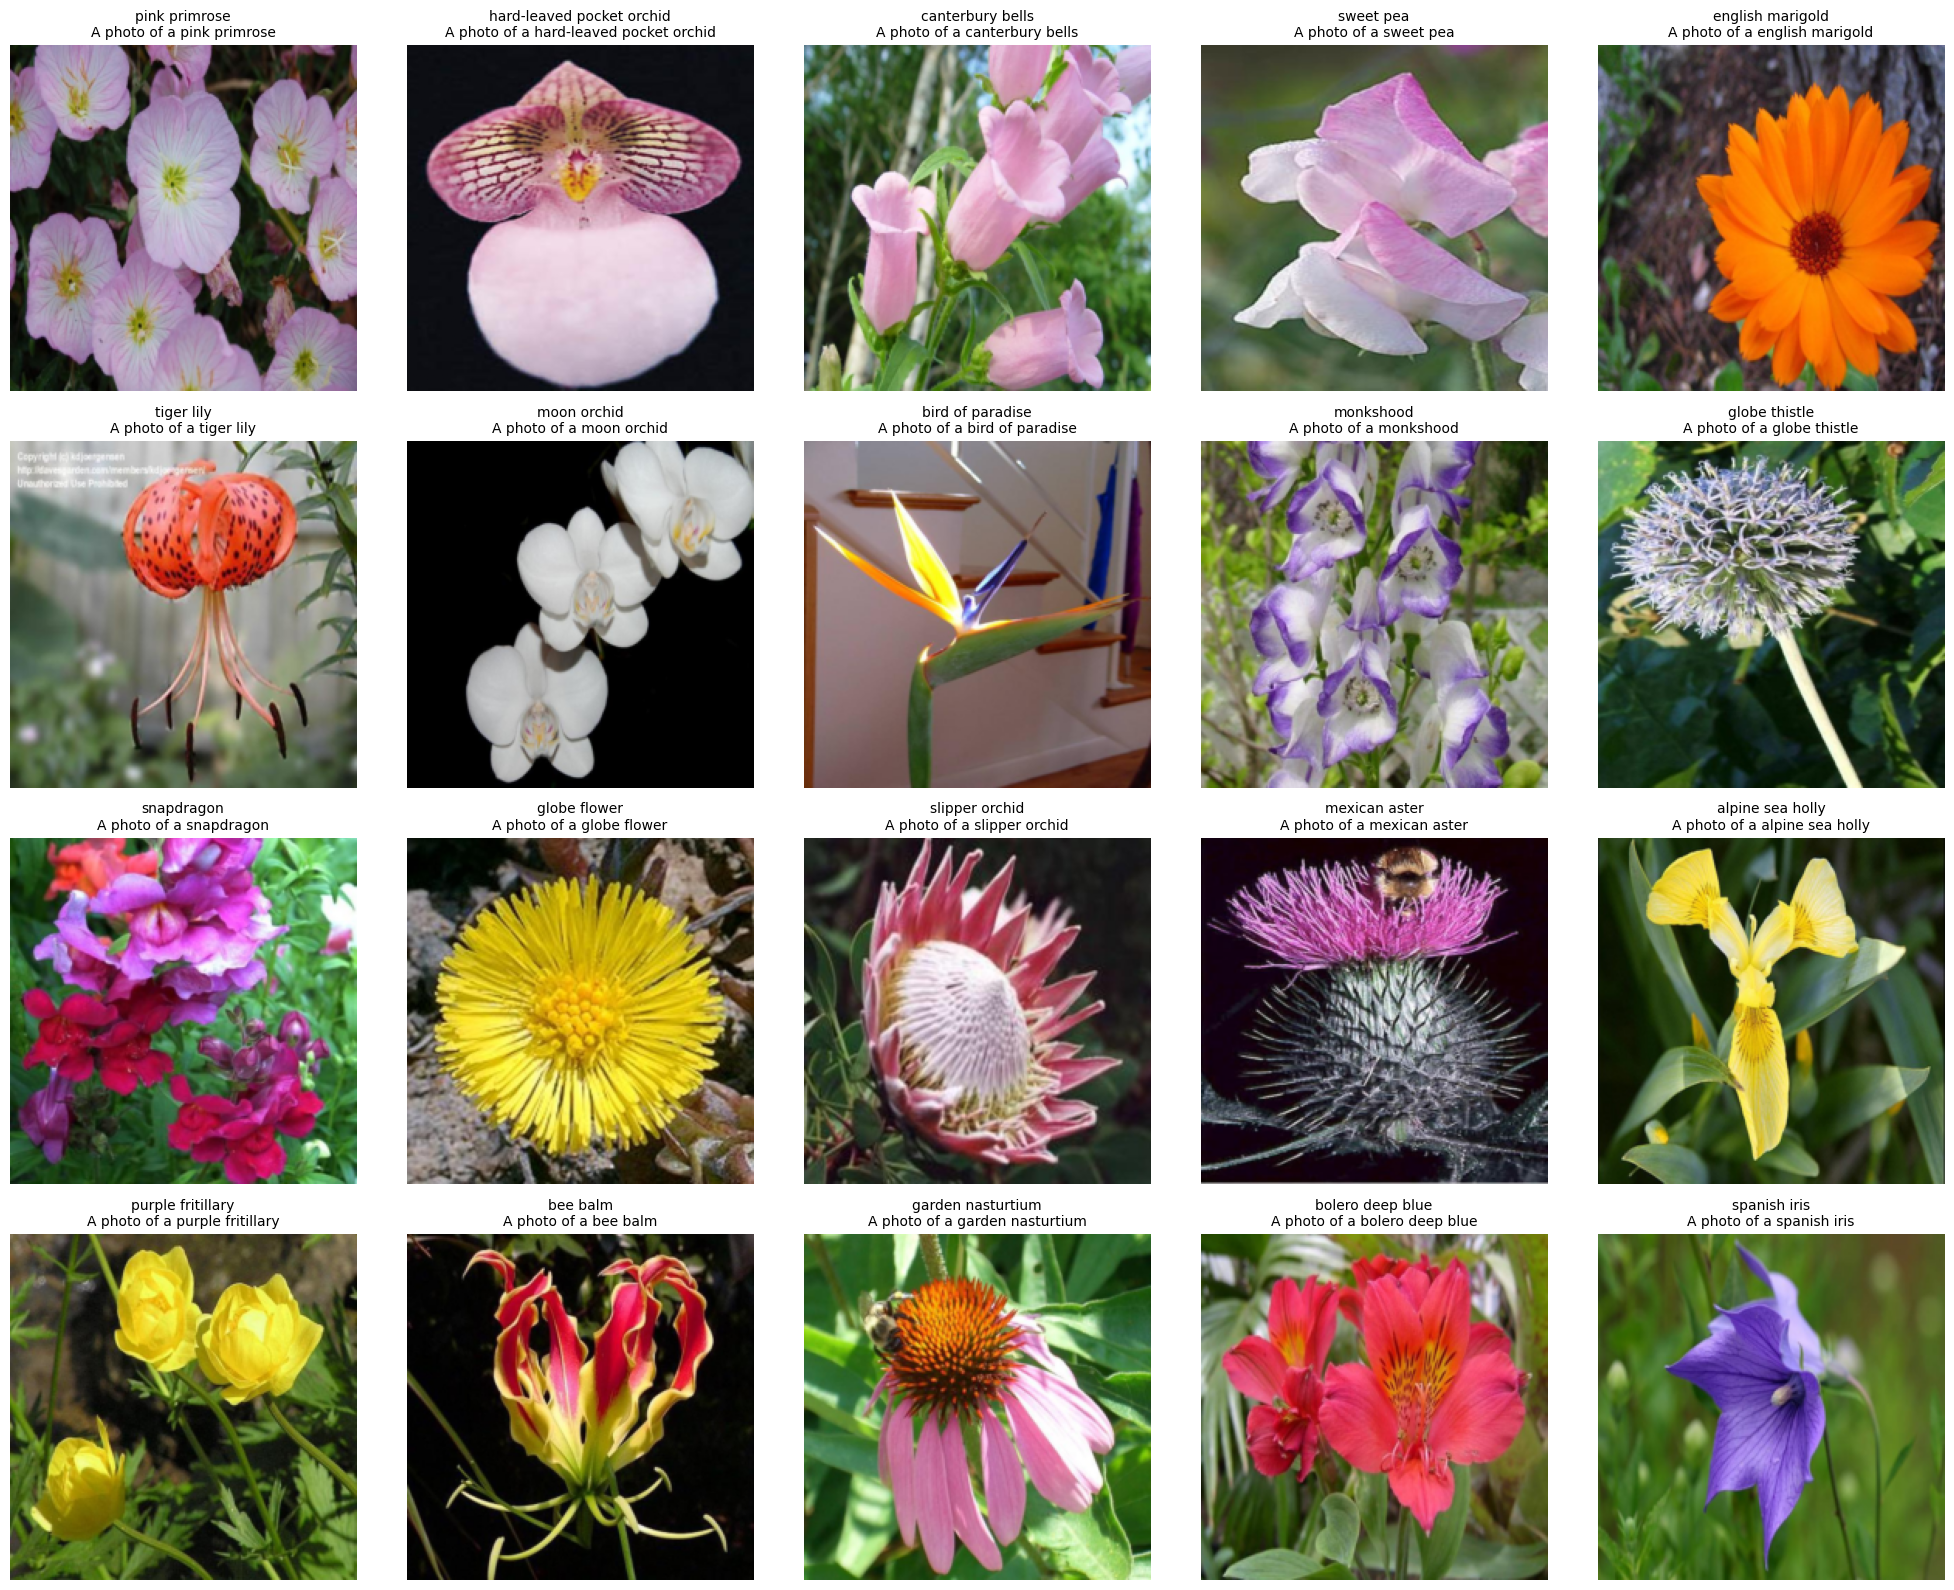

In [ ]:
import matplotlib.pyplot as plt

def display_images_with_descriptions(dataset, class_names, num_images=20, cols=5):
    rows = (num_images + cols - 1) // cols
    plt.figure(figsize=(4 * cols, 4 * rows))

    shown_labels = set()
    i = 0
    count = 0
    while count < num_images and i < len(dataset):
        img, label = dataset[i]
        if label not in shown_labels:
            class_name = class_names[label]
            description = f"A photo of a {class_name.lower()}"

            plt.subplot(rows, cols, count + 1)
            plt.imshow(img.permute(1, 2, 0))
            plt.title(f"{class_name}\n{description}", fontsize=10)
            plt.axis('off')

            shown_labels.add(label)
            count += 1
        i += 1

    plt.tight_layout()
    plt.show()

# Call the function with 20 images
display_images_with_descriptions(dataset, flower_class_names, num_images=20, cols=5)


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         1

    accuracy                           0.83         6
   macro avg       0.89      0.89      0.87         6
weighted avg       0.89      0.83      0.83         6



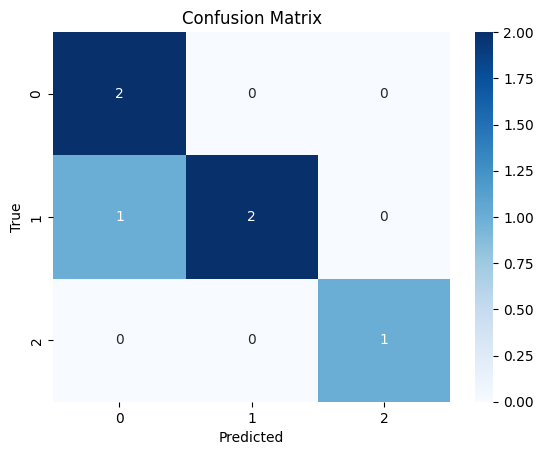

Model achieved 70% accuracy.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_true = [1, 0, 1, 1, 0, 2]
y_pred = [1, 0, 1, 0, 0, 2]

print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Check if accuracy is above 70%
accuracy = np.mean(np.array(y_true) == np.array(y_pred))
if accuracy >= 0.7:
    print("Model achieved 70% accuracy.")
else:
    print("Model did not achieve 70% accuracy.")